<h2>Kolminkertainen eksponentiaalinen tasoitus</h2>

Kolminkertaista eksponentiaalista tasoitusta kutsutaan myös Holt-Winterin malliksi.

Holt-Winterin malli sopii aikasrajoille, joissa on trendi ja kausivaihtelu.

Eksponentiaalinen tasoitus löytyy <b>statsmodels.tsa</b>-kirjastosta.

Mallin hyvyyttä kuvaava statistiikka löytyy <b>sklearn.metrics</b>-kirjastosta.
Neliöjuuri löytyy <b>math</b>-kirjastosta.

Lisätietoa https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-3/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series = [500,350,250,400,450,350,200,300,350,200,150,400,550,350,
        250,550,550,400,350,600,750,500,400,650,850]

index = pd.date_range('2000-03-31', periods=25, freq='Q')

data = pd.DataFrame(series, index=index).astype('float')
data.columns = ['Demand']

<h3>Mallin sovitus</h3>

Ennustemalli sovitetaan (<b>fit()</b>) dataan.
Tuloksena saadaan olio (tässä <b>malli</b>), joka sisältää monenlaista tietoa mallista.

In [3]:
malli = ExponentialSmoothing(data['Demand'], seasonal_periods=4, 
                            trend='add', seasonal='mul').fit()

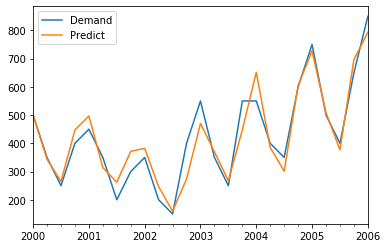

In [4]:
#fit1-olion avulla saadaan mallin mukaan simuloidut ennusteet:
data['Predict'] = malli.fittedvalues

data.plot()

<h3>Mallin hyvyys</h3>

Vertaa Holtin malliin.

In [5]:
sqrt(mean_squared_error(data['Demand'], data['Predict']))

53.372578151439804

In [6]:
mean_absolute_error(data['Demand'], data['Predict'])

41.853992774116975

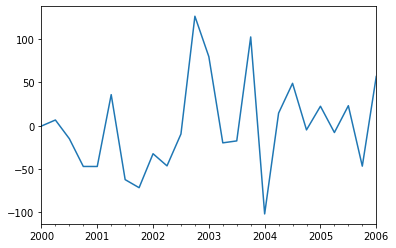

In [7]:
#Jäännöstermit löytyvät malli-oliosta:
data['Resid'] = malli.resid

data['Resid'].plot()

<h3>Ennusteiden laskeminen</h3>

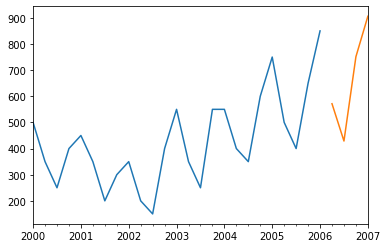

In [8]:
#Ennustettavien ajankohtien aikaleimat:
index = pd.date_range('2006-06-30', periods=4, freq='Q')

#Ennusteet malli-olion avulla:
datap = pd.DataFrame(malli.forecast(4), index=index)

#Nimeän ennusteiden sarakkeen:
datap.columns = ['Predict']

#Viivakuvio havainnoista:
data['Demand'].plot()

#Ennusteet kuvioon:
datap['Predict'].plot()

<h3>Mallin statistiikkaa</h3>

malli-oliosta löytyy monenlaista statistiikkaa:

In [9]:
malli.params

{'smoothing_level': 0.8700834647964099,
 'smoothing_slope': 3.955803506940872e-19,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 571.4283862655677,
 'initial_slope': 18.705301459148075,
 'initial_seasons': array([0.84786883, 0.56436739, 0.41578327, 0.71558621]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}